<a href="https://colab.research.google.com/github/abellizzistudent/CST383_Project/blob/main/SAV.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Are Pitbulls one of the most problematic dog Breeds?



> by: Anna Bellizzi & Nicole George

---





## Introduction

We have all heard that “pitbulls are one of the most dangerous dog breeds”, but we want to see the data behind it and prove that every dog is different, just like every human is different.  We want to figure out what is the likelihood of a bite incident occurring in a dog’s lifetime based on size, breed and age.  We want to compare this data to people’s perception of how dangerous specific breeds are regardless of size, age, or breed.  The machine learning aspect will be using intelligence to predict the likelihood of a dog biting and hopefully help more people be able to adopt dogs that are better suited for them, capable of handling, and ultimately have every dog end up in a Forever Home.


Below is the imports that will be needed for running the dataframes, visualizations, and machine learning predictions.



In [ ]:
!pip install pyreadstat
#FOR PERFPLOT CELL
!pip install perfplot
#!wget "https://cdn.pixabay.com/photo/2021/02/12/02/01/rosebud-6006985_1280.jpg"

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import pyreadstat
from matplotlib import rcParams
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
import tarfile
import perfplot
import cv2
from sklearn.linear_model import LinearRegression
from scipy import stats

# allow output to span multiple output lines in the console
pd.set_option('display.max_columns', 500)

# switch to seaborn default stylistic parameters
# see the useful https://seaborn.pydata.org/tutorial/aesthetics.html
sns.set()
sns.set_context('paper') # 'talk' for slightly larger

# change default plot size
rcParams['figure.figsize'] = 9,7

In [ ]:
# required packages according to PetFinder 
#import pandas as pd
#import numpy as np
#import seaborn as sns
#import matplotlib.pyplot as plt
#import sklearn.metrics as metrics
#from sklearn.model_selection import train_test_split
#from sklearn.model_selection import cross_val_score
#from sklearn.neighbors import KNeighborsClassifier
#from sklearn.metrics import accuracy_score
#from sklearn.metrics import confusion_matrix
#from sklearn.metrics import cohen_kappa_score
#from sklearn.linear_model import LogisticRegression
#from sklearn.naive_bayes import GaussianNB 
#from sklearn.ensemble import RandomForestClassifier
#from sklearn.compose import ColumnTransformer
#from sklearn.pipeline import Pipeline
#from sklearn.impute import SimpleImputer
#from sklearn.preprocessing import StandardScaler, OneHotEncoder
#from sklearn.model_selection import GridSearchCV

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
# /content/drive/Shareddrives/Data Science Project/DogBiteData/ny-dog-bites-2015-2021-CLEAN.csv
#dog bite data

#/content/drive/Shareddrives/Data Science Project/DogBiteData/sf-raw-data-dog-bites-2014-2018-CLEAN.csv
#sf raw dog bite data

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# San Francisco Bite Data 2014-2018

San Francisco Bite Data, 2014-2018 - Total rows: 3863<br>
Exported PDF to Exel via Adobe Acrobat<br>
Removed rows that contained only total by breed sections - 267 rows<br>
Removed header rows that appeard within the doc as a PDF - 475 rows<br>
Split bite severity into two seperate columns - BITE_CODE and BITE_SEVERITY<br>
**Retaining both columns for now, both are not necessary since they contain the same infomation**<br>
Replaced alpha "U" code in BITE_SEVERITY for UNKNOWN to 9 to match numeric convention of the column<br>
Removed spaces in BITE_SEVERITY alpha codes for ease of search<br>
Removed BITE column because each row value for that column was 1. Each row represents a single event already, column is not necessary.<br>
Total Rows: 3626<br>
Total Cols: 5<br>
Change column names to all lowercase<br>
Imported as CSV - sf-raw-data-dog-bites-2014-2018-CLEAN.csv<br>
<br>
**NOTE** need to correct breed_group, both of these exist in the column: 'GREAT PYRENEES' 'GREAT PYRENEESE'


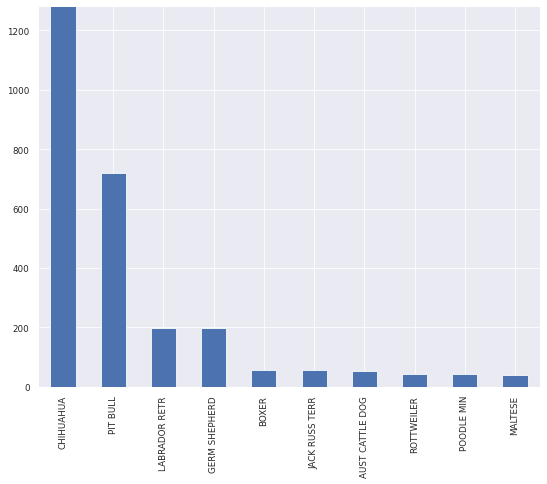

In [ ]:
df_sf = pd.read_csv("/content/drive/Shareddrives/Data Science Project/DogBiteData/sf-raw-data-dog-bites-2014-2018-CLEAN.csv")
###breed_group may be an unnecessary column:
#breed_group = df_sf.breed_group
#print(breed_group.unique())
#primary_breed = df_sf.primary_breed
#print(primary_breed.unique().size)
#print(df_sf.head())
#df_sf.info()
df_sf['breed_group'].value_counts().nlargest(10).plot(kind='bar')



# New York Bite Data 2015-2021

Removed columns Borough, ZipCode, Species<br>
Combined Gender and Spay/Neuter columns to match format of DF_SF gender column<br>
Removed Key column and Date of bite column<br>
Ages modified to standard values, removed alphas and turned numbers into decimal value in years.<br>
Added Bad_Data column to tag potentially bad rows that could be thrown out of the dataset without tossing them out quite yet.<br>
Added breed_group column to match df_sf dataset and clarify primary_breed values that specify a group.<br>
Added Multi-Dog column for entries invloving more than one dog in description. Low numbers, may consider dropping these rows.<br><br>
Standardized breed column and breed_group column.<br> About 450 rows out of 22,000 were unable to be categorized, but contain dog descriptions so data was kept and categorized as "unknown".
<br><br>
The data does not include whether one dog is a multi-offender, which may or may not be significant for our analysis.<br><br>
This dataset can potentially be joined to the SF dataset on the breed_group	primary_breed	and	gender columns.<br><br>
may consider adding a bite_code column with code 1 for all entries. Since an entry here implies an incident it would match up to the existing column in the sf data.


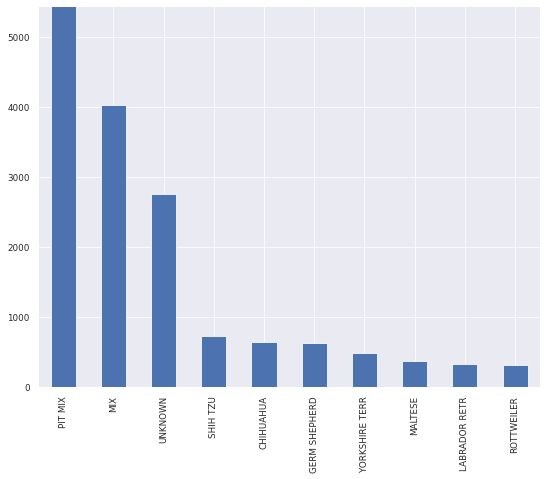

In [ ]:
df_ny = pd.read_csv("/content/drive/Shareddrives/Data Science Project/DogBiteData/ny-dog-bites-2015-2021-CLEAN.csv")
#print(df_ny.head())
#df_ny.info()
df_ny['breed_group'].value_counts().nlargest(10).plot(kind='bar')

#Merged Bite Data- SF and NY combined

In [ ]:
df_md = pd.read_csv("/content/drive/Shareddrives/Data Science Project/DogBiteData/merged-bite-data-CLEAN.csv")

Merged Bite data file includes data from sf and ny datasets.
<br>**Data Fields**
<br>*Dataset* - Incase it was necessary, this flags each row and identifies which dataset it came from.
<br>Data Values: ny, sf
<br><br>*breed_group* - The group under which the breed falls. For example, a user-entered primary_breed may be "American Pit Bull Terrier/Pit Bull" and will thus be part of the "PIT BULL" breed_group. A primary_breed description "Belgian Malinois" and "MALINOIS" are both in breed_group "BELG MALINOIS"
<br><br>*primary_breed* - Contains the user-input breed description. This varies in spelling, vernacular, and length, which results in the breed_group being more reliable for categorization, but allows for insight into human perception/descriptions which are useful for our analysis.
<br><br>*bite_code* - Numerical code corresponding to text values in "bite_severity" column.
<br>Values 0-4: SNGLNIP, SNGLB, PROLONGB, MULTIB, MAULING
<br><br>*bite_severity* - Contains descriptor for bite_code values
<br>*gender* - Male, Neutered, Female, Spayed
<br>Values: M, N, F, S
<br><br>*age* - Scaled to decimal value in years. Inconsistency in age entry fomat required modification of hte original column to remove letters expressing Y for years, M for months, fractions and alpha-expressed ages, like one, two-and-a-half, etc.
<br>Sample Values: 0.75. 6, 3, .67, 7.25
<br>
<br>UNKNOWN and "U" values were removed and are now reflected as NaN. This simplifies some of the filtering we would have to do.
<br>Removed the bad_data column, and removed all rows identified as bad data.
removed the original age column that had mixed expressions for age, and simplified to the adjusted age column only, renamed to "age".




#How much data is there?

In [ ]:
num_rows, num_cols = df_md.shape
print (num_rows, " Rows \n", num_cols, "Columns: ")
print(list(df_md.columns))
print("total number of NaN values in DF: ", df_md.isna().sum().sum())

na = df_md.isna().sum().sum()
#print(na)
total = df_md.count().sum().sum()
#print(total)
print("Percentage of NaN values in DF: ", ((na/total)*100).round(2),"%")
print("rows with NA: ", df_md.isna().any(axis=1).sum())
naRows = df_md.isna().any(axis=1).sum()
print("Percentage of rows containing NaN: ", ((naRows/total)*100).round(2),"%")
print("fraction of the column values that are NA values:\n", (df_md.isnull().sum() / len(df_md)*100).round(2))
df_md.info()

21911  Rows 
 7 Columns: 
['dataset', 'breed_group', 'primary_breed', 'bite_code', 'bite_severity', 'gender', 'age']
total number of NaN values in DF:  54701
Percentage of NaN values in DF:  55.43 %
rows with NA:  21911
Percentage of rows containing NaN:  22.2 %
fraction of the column values that are NA values:
 dataset           0.00
breed_group       0.00
primary_breed     0.00
bite_code        84.95
bite_severity    84.95
gender           31.44
age              48.30
dtype: float64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21911 entries, 0 to 21910
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   dataset        21911 non-null  object 
 1   breed_group    21911 non-null  object 
 2   primary_breed  21911 non-null  object 
 3   bite_code      3297 non-null   float64
 4   bite_severity  3297 non-null   object 
 5   gender         15022 non-null  object 
 6   age            11327 non-null  float64
dtypes

We learn that most NaN values fall into two columns: **bite_code** and **bite_severity**. This is consistent with observations during merging and cleaning the data. This is because only the sf dataset contained these values. We find them to be valuable for a subset of analysis that could be done on the smaller dataset. Since each row is representative of a bite event, that is more valuable for helping answer our question.<br>
We have two float columns, so not much numerical data which is ok since we are looking primarily at breed behavior within a sample of positive bite incidents.

While this does not quantify the data, it gives us some insight into some runtime metrics.<br>
From https://github.com/nschloe/perfplot:<br>
"perfplot extends Python's timeit by testing snippets with input parameters (e.g., the size of an array) and plotting the results."

In [ ]:
#CODE from https://stackoverflow.com/questions/15943769/how-do-i-get-the-row-count-of-a-pandas-dataframe
perfplot.save(
    "/usr/local/share/jupyter/nbextensions/out.png", transparent=False,
    setup=lambda n: pd.DataFrame(np.arange(n * 3).reshape(n, 3)),
    n_range=[2**k for k in range(25)],
    kernels=[
        lambda df_md: len(df_md.index),
        lambda df_md: df_md.shape[0],
        lambda df_md: df_md[df_md.columns[0]].count(),
    ],
    labels=["len(df_md.index)", "df_md.shape[0]", "df_md[df_md.columns[0]].count()"],
    xlabel="Number of rows",
)

Output()

In [ ]:
%%html
<img src='/nbextensions/out.png' />

We get a breakdown of some of the mix details for primary_breed when breed_group is "MIX". I'd like to plot this to visualize the MIX breeds that are more frequently listed and if that correlates with the top 10 breeds in the following graph.

In [ ]:
#Look at Unknown values. Unknowns include NaN converted to "U" signifier
nan_count = df_md.isna().sum().sum()
print("Percent of Unknown age: ", (df_md['age'].isna().sum().sum() / len(df_md) *100).round(2))
print("Percent of Unknown gender: ", (df_md['gender'].isna().sum().sum() / len(df_md) *100).round(2))
print("Percent of Unknown breed_group: ", (df_md['breed_group'].isna().sum().sum() / len(df_md) *100).round(2))
print("Percent of Unknown primary_breed: ", (df_md['primary_breed'].isna().sum().sum() / len(df_md) *100).round(2))
print("Percent of MIX breed in the dataset: ", (df_md['primary_breed'].str.contains('MIX', case=False, na=False).sum() / len(df_md) *100).round(2))
print("Percent of PIT BULL breed in the dataset: ", (df_md['primary_breed'].str.contains('PIT BULL', case=False, na=False).sum() / len(df_md) *100).round(2))
print("Percent of CHIHUAHUA breed in the dataset: ", (df_md['primary_breed'].str.contains('CHIHUAHUA', case=False, na=False).sum() / len(df_md) *100).round(2))
print("Mean age for all bite incidents: ", np.mean(df_md['age']).round(2))
print("Min age for all bite incidents: ", np.min(df_md['age']))
print("Max age for all bite incidents: ", np.max(df_md['age']))
#Look at MIX breeds and see if there is a correlation between top 10 breeds with bite incidents and mixes containing those breeds
print("MIX breed where primary_breed contains 'oodle': ", (df_md[df_md['primary_breed'].str.contains('oodle', case=False, na=False)]['breed_group'].str.contains('MIX', case=False)).sum())
print("MIX breed where primary_breed contains '/': ", (df_md[df_md['primary_breed'].str.contains('/', case=False, na=False)]['breed_group'].str.contains('MIX', case=False)).sum())
print("MIX breed where primary_breed contains 'Terrier': ", (df_md[df_md['primary_breed'].str.contains('terrier', case=False, na=False)]['breed_group'].str.contains('MIX', case=False)).sum())
print("MIX breed where primary_breed contains 'shih': ", (df_md[df_md['primary_breed'].str.contains('shih', case=False, na=False)]['breed_group'].str.contains('MIX', case=False)).sum())
print("MIX breed where primary_breed contains 'chi': ", (df_md[df_md['primary_breed'].str.contains('chi', case=False, na=False)]['breed_group'].str.contains('MIX', case=False)).sum())
print("MIX breed where primary_breed contains 'germ': ", (df_md[df_md['primary_breed'].str.contains('germ', case=False, na=False)]['breed_group'].str.contains('MIX', case=False)).sum())
print("MIX breed where primary_breed contains 'york': ", (df_md[df_md['primary_breed'].str.contains('york', case=False, na=False)]['breed_group'].str.contains('MIX', case=False)).sum())
print("MIX breed where primary_breed contains 'lab': ", (df_md[df_md['primary_breed'].str.contains('lab', case=False, na=False)]['breed_group'].str.contains('MIX', case=False)).sum())
print("MIX breed where primary_breed contains 'malt': ", (df_md[df_md['primary_breed'].str.contains('malt', case=False, na=False)]['breed_group'].str.contains('MIX', case=False)).sum())
print("MIX breed where primary_breed contains 'pit': ", (df_md[df_md['primary_breed'].str.contains('pit', case=False, na=False)]['breed_group'].str.contains('MIX', case=False)).sum())
print("MIX breed where primary_breed contains 'pom': ", (df_md[df_md['primary_breed'].str.contains('pom', case=False, na=False)]['breed_group'].str.contains('MIX', case=False)).sum())
#df_md.sample(n=10)

Percent of Unknown age:  48.3
Percent of Unknown gender:  31.44
Percent of Unknown breed_group:  0.0
Percent of Unknown primary_breed:  0.0
Percent of MIX breed in the dataset:  15.83
Percent of PIT BULL breed in the dataset:  27.64
Percent of CHIHUAHUA breed in the dataset:  9.81
Mean age for all bite incidents:  4.53
Min age for all bite incidents:  0.08
Max age for all bite incidents:  68.0
MIX breed where primary_breed contains 'oodle':  328
MIX breed where primary_breed contains '/':  1245
MIX breed where primary_breed contains 'Terrier':  263
MIX breed where primary_breed contains 'shih':  224
MIX breed where primary_breed contains 'chi':  229
MIX breed where primary_breed contains 'germ':  132
MIX breed where primary_breed contains 'york':  157
MIX breed where primary_breed contains 'lab':  346
MIX breed where primary_breed contains 'malt':  185
MIX breed where primary_breed contains 'pit':  31
MIX breed where primary_breed contains 'pom':  47


Here we get an idea of reported incidents by severity. While a later display will show a correlation between gender and bite severity, here we see that more severe incidents occur much less frequently than milder incidents like a nip or single bite.

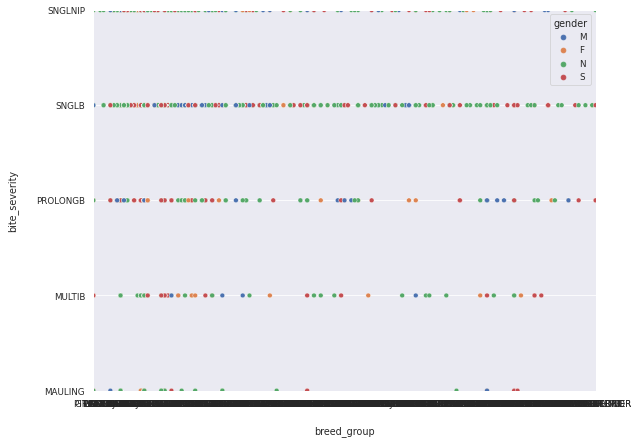

In [ ]:
sns.scatterplot(x = 'breed_group', y = 'bite_severity', data=df_md, hue='gender')

Age of dogs by breed at the time of an incident. We need to clean up the age column, there is a single outlier, likely a typo for age 68.

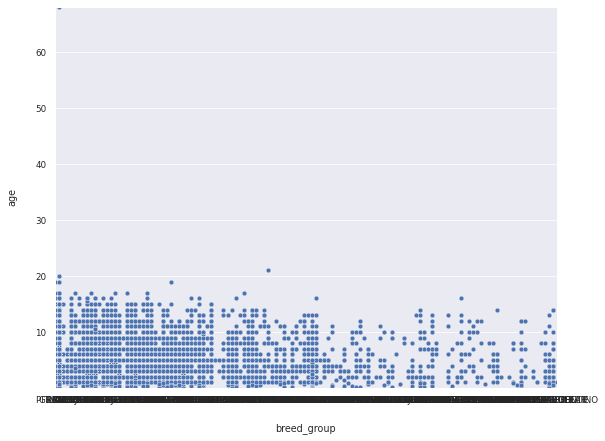

In [ ]:
sns.scatterplot(x = 'breed_group', y = 'age', data=df_md)

Bite code by gender, we see overwhelmingly the most severe bite type occurs with neutered males. This is not consistent with perception and general biases.

Text(0.5, 1.0, 'Bite incident by gender')

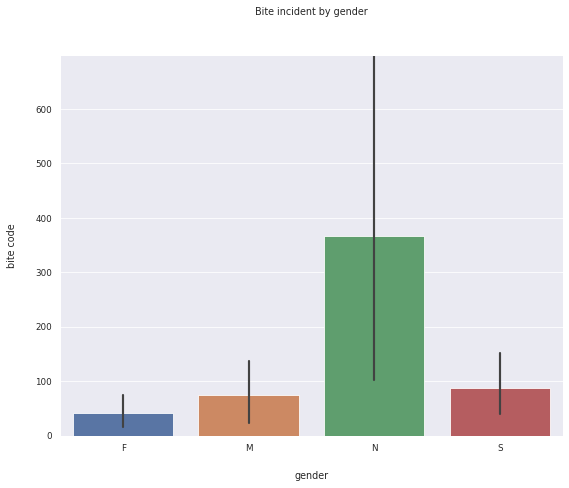

In [ ]:
age_analysis = df_md.groupby(['gender', 'bite_code']).size().reset_index(name='bite code')
sns.barplot(x="gender", y="bite code", data=age_analysis).set_title("Bite incident by gender")

Top 10 breeds for all bite data in the dataset:

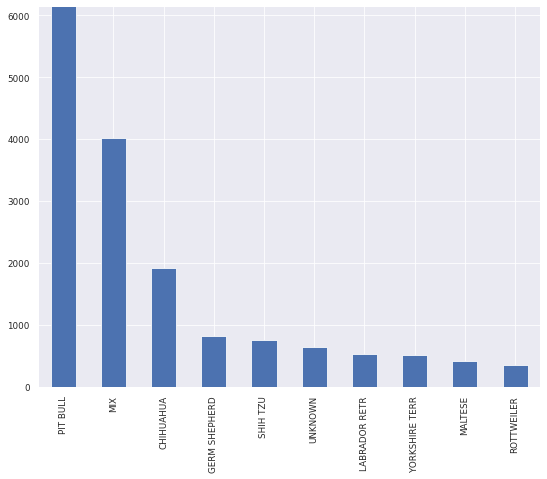

In [ ]:
df_md['breed_group'].value_counts().nlargest(10).plot(kind='bar')

# Dog Breeds Enriched

In [ ]:
df_be = pd.read_csv("/content/drive/Shareddrives/Data Science Project/DogBiteData/dog breeds_enriched_20210503.csv")
print(df_be.head())
df_be.info()
#Note change name to breed_group to be able to combine all 3 data sets

              Breed Breed Group AKC  \
0     Affenpinscher       Toy Group   
1      Afghan Hound     Hound Group   
2              Aidi  Not Recognized   
3  Airedale Terrier   Terrier Group   
4        Akbash Dog  Not Recognized   

                                   Breed Group CKC      Breed Group UKC  \
0               Group 5: Pinschers and Schnauzers        Companion Dog    
1                      Group 8: Sighthound Breeds   Sighthound & Pariah   
2                                   Not Recognized         Guardian Dog   
3                         Group 6: Terrier Breeds               Terrier   
4  Group 9: Large Guardian Pastoral/Mountain Dogs          Guardian Dog   

                           CKC Subgroup  height_low_inches  \
0  5-B: Small Pinschers and Schnauzers                 9.0   
1          8-B: Long Haired Sighthounds               25.0   
2                        Not Recognized               20.0   
3                   6-A: Large Terriers               22.0   
4   

Average weights by breed

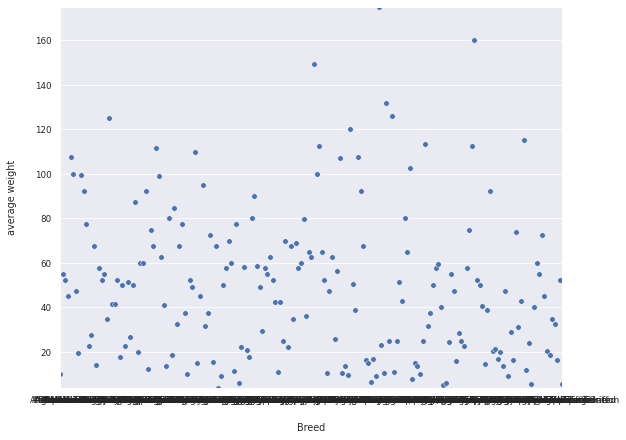

In [ ]:
sns.scatterplot(x = 'Breed', y = 'average weight', data=df_be, s=30)

Compare breed names used in NY and SF data files to those in the enriched breed name dataset

In [ ]:
sfBreeds = pd.Series(df_sf['breed_group'])
nyBreeds = pd.Series(df_ny['breed_group'])
breeds = pd.Series(df_be['Breed'])

ser = pd.Series(dtype='object')
ser = ser.append(sfBreeds.str.lower())
ser = ser.append(nyBreeds.str.lower())
ser = ser.append(breeds.str.lower())
#print(ser.unique())

# Stanford Dogs Dataset Images of Dog Breeds

In [ ]:
#Since this is a tarfile I am having trouble opening it, it was only going to be used for aestetic purposes. 
#I will continue working on this before the project is due.
#df_st = pd.read_csv('/lists.tar', compression='gzip', header=0, sep=' ', quotechar='"', error_bad_lines=False)
#OPEN TAR WITH WINZIP

# Merging Data Sets



     breed_group  primary_breed  bite_code bite_severity gender age  \
0  ALASKAN HUSKY  ALASKAN HUSKY          0       SNGLNIP      M   5   
1  ALASKAN HUSKY  ALASKAN HUSKY          0       SNGLNIP      M   5   
2  ALASKAN HUSKY  ALASKAN HUSKY          0       SNGLNIP      M   5   
3  ALASKAN HUSKY  ALASKAN HUSKY          0       SNGLNIP      M   5   
4  ALASKAN HUSKY  ALASKAN HUSKY          1         SNGLB      M   5   

  modified_age multi_dog bad_data  
0            5         F        F  
1            5         F        F  
2            5         F        F  
3            5         F        F  
4            5         F        F  
<class 'pandas.core.frame.DataFrame'>
Int64Index: 591 entries, 0 to 590
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   breed_group    591 non-null    object
 1   primary_breed  591 non-null    object
 2   bite_code      591 non-null    int64 
 3   bite_severity  591 non-null    ob

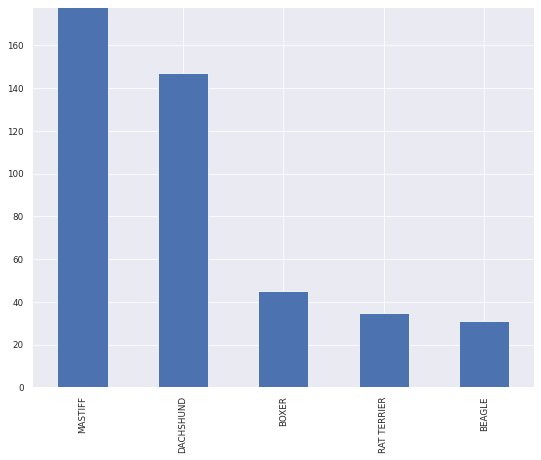

In [ ]:
data= pd.merge(df_sf, df_ny)
data
print(data.head())
data.info()
print("fraction of the column values that are NA values \n", data.isnull().sum() / len(data))

data['breed_group'].value_counts().nlargest(5).plot(kind='bar')

#Incidents by top 5 breeds

Consider analyzing top 3 breeds from NY data and better categorizing. Many "MIX" and unknown can be identified by breeds listed in the dog breeds_enriched dataset.

CHIHUAHUA        1281
PIT BULL          719
LABRADOR RETR     198
GERM SHEPHERD     198
BOXER              56
Name: breed_group, dtype: int64
PIT MIX      5437
MIX          4029
UNKNOWN      2762
SHIH TZU      732
CHIHUAHUA     648
Name: breed_group, dtype: int64


Text(0.5, 1.0, 'New York Incidents')

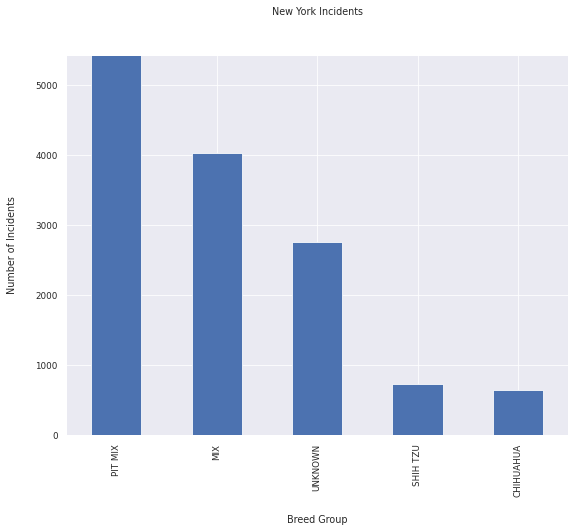

In [ ]:
sf_inc = df_sf['breed_group'].value_counts().nlargest(5)
ny_inc = df_ny['breed_group'].value_counts().nlargest(5)
print(sf_inc)
print(ny_inc)


sf_inc.plot(kind='bar')
plt.xlabel("Breed Group")
plt.ylabel("Number of Incidents")
plt.title("San Francisco Incidents")

ny_inc.plot(kind='bar')
plt.xlabel("Breed Group")
plt.ylabel("Number of Incidents")
plt.title("New York Incidents")

As you can see here, the largest breed groups by incidents are chihuahua according to san fransisco and pitmix according to new york.

# Machine Learning

We are going to start by using linear regression for the machine learning.

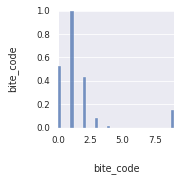

In [ ]:
sns.pairplot(data)
plt.show()

In [ ]:
X=data[['breed_group']]
y=data['breed_group'].values

regr=LinearRegression()
regr.fit(X,y)
fit= regr.predict(X)

sns.regplot(x=fit, y='breed_group', data=df_sf)
plt.show()
#Getting error with not converting string to float for 'affenpinscher'

ValueError: ignored

We are going to predict the likelihood of a bite incident occuring in a dog's lifetime based on size, breed, and age. 

We will compare this data by people's perception based on breed banning in different states.

# Conclusion

Our goal is to help people understand that all dogs need to be trained regardless of breed.  
We hope to give knowledge to everyone to help find the breeds that are suitable for them to prevent people from giving up their dogs.